In [5]:
! pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 5.0 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.1 MB 5.0 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/11.1 MB 5.0 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 5.1 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 4.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 4.9 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.4/11.1 MB 4.9 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 4.9 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 4.6 MB/s eta 0:00:00
   


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.preprocessing import StandardScaler 



data = pd.read_csv("loan_detection.csv")



X = data.drop("loan_no", axis=1)  
y = data["loan_no"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = KMeans(n_clusters=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.011774702597717892
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.02      0.04      1423
           1       0.86      0.01      0.02      6815
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00   

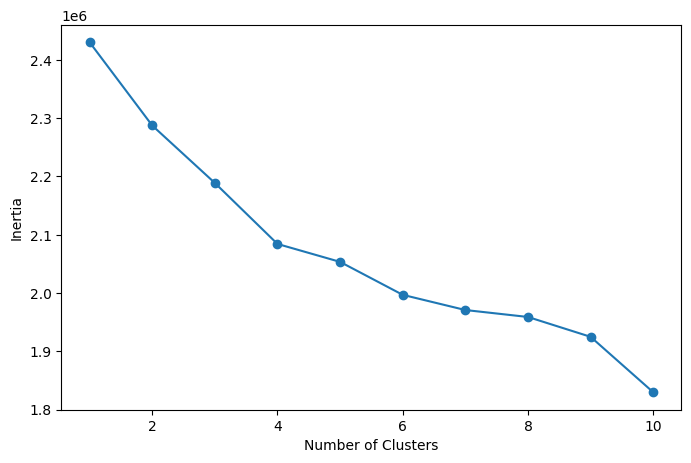

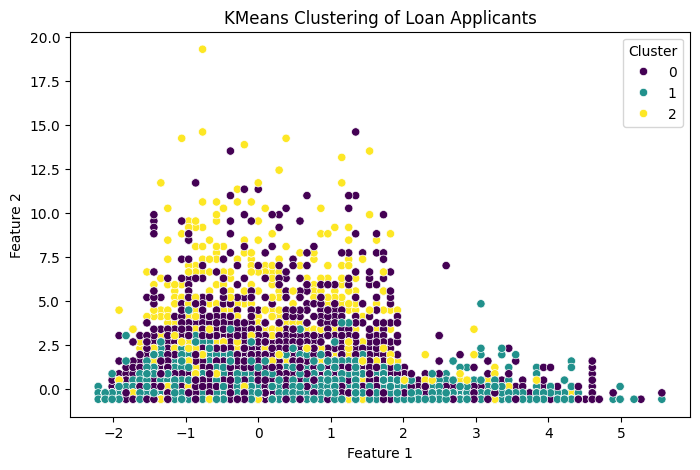

Accuracy: 0.8873512988589464

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.51      0.25      0.34       935

    accuracy                           0.89      8238
   macro avg       0.71      0.61      0.64      8238
weighted avg       0.86      0.89      0.87      8238



In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("loan_detection.csv")


data.fillna(data.mean(), inplace=True)  
data.fillna(data.mode().iloc[0], inplace=True)  


data = pd.get_dummies(data, drop_first=True)


X = data.drop("Loan_Status_label", axis=1)  
y = data["Loan_Status_label"]  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


data["Cluster"] = cluster_labels


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette="viridis")
plt.title("KMeans Clustering of Loan Applicants")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Running KMeans for 2 clusters...
Silhouette Score for 2 clusters: 0.5582453039316981
Running KMeans for 3 clusters...
Silhouette Score for 3 clusters: 0.4795447916012411
Running KMeans for 4 clusters...
Silhouette Score for 4 clusters: 0.5115371859574972
Running KMeans for 5 clusters...
Silhouette Score for 5 clusters: 0.451273309750884


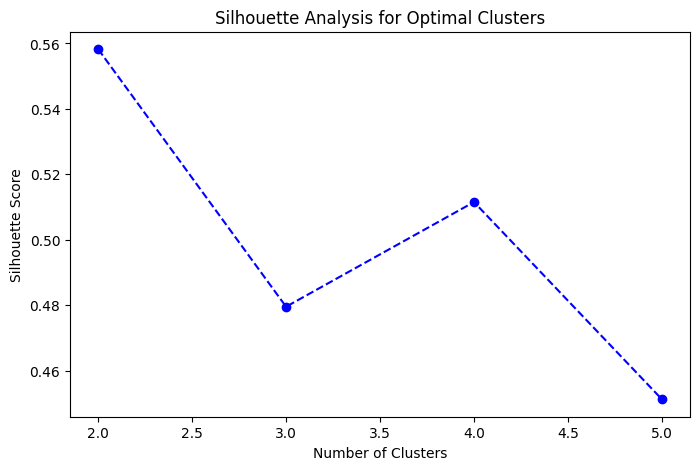

Optimal Number of Clusters (Silhouette): 2


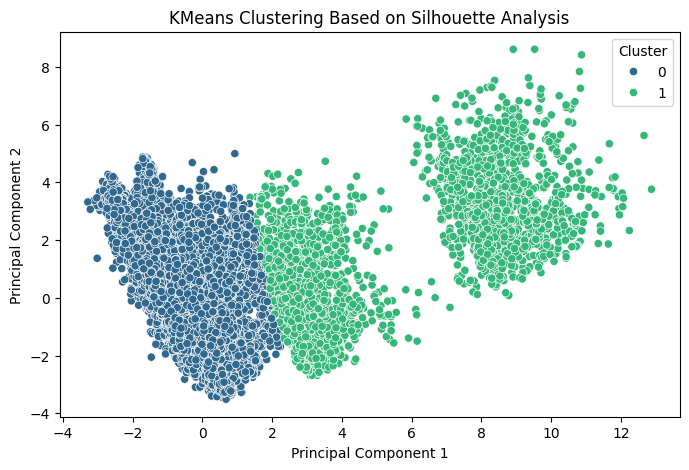

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data = pd.read_csv("loan_detection.csv")  

data.fillna(data.mean(), inplace=True)  
data.fillna(data.mode().iloc[0], inplace=True)  
data = pd.get_dummies(data, drop_first=True) 

X = data.drop("Loan_Status_label", axis=1) 
y = data["Loan_Status_label"]  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)  

silhouette_scores = []
cluster_range = range(2, 6)  

for k in cluster_range:
    print(f"Running KMeans for {k} clusters...")
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)  
    score = silhouette_score(X_pca, cluster_labels)  
    silhouette_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score}")


plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="--", color="b")
plt.title("Silhouette Analysis for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print("Optimal Number of Clusters (Silhouette):", optimal_clusters)

kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)  

data["Cluster"] = cluster_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette="viridis")
plt.title("KMeans Clustering Based on Silhouette Analysis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
